In [222]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from sklearn import neighbors


Text(0.5, 1.0, 'ROC Curve')

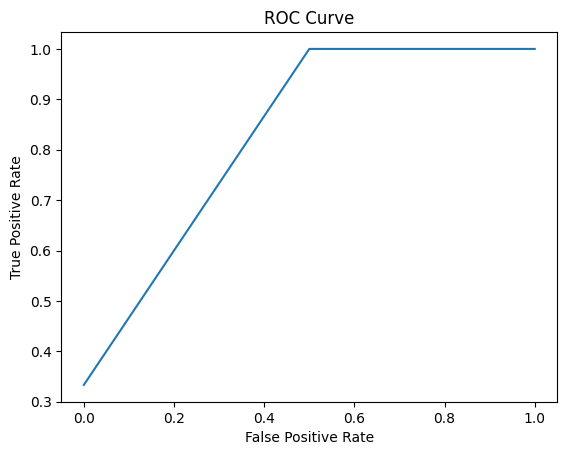

In [223]:
q5 = [[1/3, 0], [2/3, 1/4], [1, 1/2], [1, 1]]
df_q5 = pd.DataFrame(q5, columns= ['TPR', 'FPR'])
fig, ax = plt.subplots()

ax.plot(df_q5['FPR'], df_q5['TPR'])
ax.set_xlabel("False Positive Rate")
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')


In [224]:
D2z = pd.read_csv('data/D2z.txt', names= ["x1", "x2", "y"], sep = ' ')
D2z.head()

,x1,x2,y
0,-0.333338,-0.087171,0
1,-1.531730,0.358194,1
2,1.549590,-0.364050,0
3,-1.349910,0.252063,1
4,1.283850,-0.531146,0


In [225]:
X = D2z.drop('y', axis = 1)
X.values
Y = D2z['y']
Y.values

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0], dtype=int64)

In [226]:
s = np.arange(-20, 21)/10
distances_list = []
k = 0
for i in s:
    for j in s:
       new_point = np.array([i, j])
       distances = np.linalg.norm(X - new_point, axis = 1)
       distances_min = distances.argsort()[k]
       y_distances_min = Y[distances_min]
       distances_list.append([i, j, y_distances_min])

distances_list = pd.DataFrame(distances_list, columns= ['x1', 'x2', 'y'])


In [227]:
D2z['y'] == 0

0       True
1      False
2       True
3      False
4       True
       ...  
195    False
196     True
197    False
198    False
199     True
Name: y, Length: 200, dtype: bool

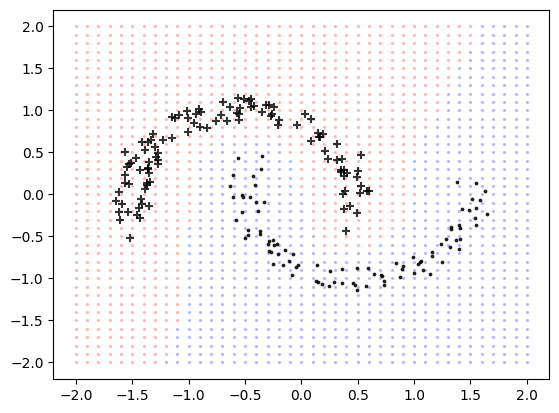

In [228]:
group1 = distances_list[distances_list['y'] == 1]
group2 = distances_list[distances_list['y'] == 0]
group1_train = D2z[D2z['y'] == 1] 
group2_train = D2z[D2z['y'] == 0] 
fig, ax = plt.subplots()

ax.scatter(group1['x1'], group1['x2'], color = 'red', alpha= 0.2, s = 2)
ax.scatter(group2['x1'], group2['x2'], color = 'blue', alpha= 0.2, s = 2)
ax.scatter(group1_train['x1'], group1_train['x2'], color = 'black', marker= '+', alpha=0.8)
ax.scatter(group2_train['x1'], group2_train['x2'], color = 'black', marker= 'o', alpha = 0.8, s = 3)

plt.show()

In [229]:
df_email = pd.read_csv('data/emails.csv')

In [230]:
#fold1
fold1_train = df_email[1000:]
X_fold1 = fold1_train.drop(['Email No.', 'Prediction'], axis = 1).apply(pd.to_numeric, axis = 1).reset_index()
X_fold1 = X_fold1.drop('level_0', axis = 1)
Y_fold1 = fold1_train['Prediction'].reset_index()

fold1_test = df_email[0:1000]
x_test_fold1 = fold1_test.drop(['Email No.', 'Prediction'], axis = 1).apply(pd.to_numeric, axis = 1)
y_actual_fold1 = fold1_test['Prediction']

#fold2
fold2_train = df_email.drop(index= range(999, 2000))
X_fold2 = fold2_train.drop(['Email No.', 'Prediction'], axis=1).apply(pd.to_numeric, axis = 1).reset_index()
X_fold2 = X_fold2.drop('level_0', axis = 1)
Y_fold2 = fold2_train['Prediction'].reset_index()

fold2_test = df_email[999:2000]
x_test_fold2 = fold2_test.drop(['Email No.', 'Prediction'], axis = 1).apply(pd.to_numeric, axis = 1)
x_test_fold2 = x_test_fold2.reset_index().drop('level_0', axis = 1)
y_actual_fold2 = fold2_test['Prediction']
y_actual_fold2 = y_actual_fold2.reset_index()['Prediction']

#fold3
fold3_train = df_email.drop(index= range(1999, 3000))
X_fold3 = fold3_train.drop(['Email No.', 'Prediction'], axis=1).apply(pd.to_numeric, axis = 1).reset_index()
X_fold3 = X_fold3.drop('level_0', axis = 1)
Y_fold3 = fold3_train['Prediction'].reset_index()

fold3_test = df_email[1999:3000]
x_test_fold3 = fold3_test.drop(['Email No.', 'Prediction'], axis = 1).apply(pd.to_numeric, axis = 1)
x_test_fold3 = x_test_fold3.reset_index().drop('level_0', axis = 1)
y_actual_fold3 = fold3_test['Prediction']
y_actual_fold3 = y_actual_fold3.reset_index()['Prediction']

#fold4
fold4_train = df_email.drop(index= range(2999, 4000))
X_fold4 = fold4_train.drop(['Email No.', 'Prediction'], axis=1).apply(pd.to_numeric, axis = 1).reset_index()
X_fold4 = X_fold4.drop('level_0', axis = 1)
Y_fold4 = fold4_train['Prediction'].reset_index()

fold4_test = df_email[2999:4000]
x_test_fold4 = fold4_test.drop(['Email No.', 'Prediction'], axis = 1).apply(pd.to_numeric, axis = 1)
x_test_fold4 = x_test_fold4.reset_index().drop('level_0', axis = 1)
y_actual_fold4 = fold4_test['Prediction']
y_actual_fold4 = y_actual_fold4.reset_index()['Prediction']

#fold5
fold5_train = df_email.drop(index= range(3999, 5000))
X_fold5 = fold5_train.drop(['Email No.', 'Prediction'], axis=1).apply(pd.to_numeric, axis = 1).reset_index()
X_fold5 = X_fold5.drop('level_0', axis = 1)
Y_fold5 = fold5_train['Prediction'].reset_index()

fold5_test = df_email[3999:5000]
x_test_fold5 = fold5_test.drop(['Email No.', 'Prediction'], axis = 1).apply(pd.to_numeric, axis = 1)
x_test_fold5 = x_test_fold5.reset_index().drop('level_0', axis = 1)
y_actual_fold5 = fold5_test['Prediction']
y_actual_fold5 = y_actual_fold5.reset_index()['Prediction']

# result
res = []


In [241]:
# Sklearn Knn

In [255]:
def accuracy(actual, pred):
    TP, TN, FP, FN = 0, 0, 0, 0
    for i in range(len(actual)):
        if actual[i] == 0 and pred[i][1] == 0:
            TN = TN + 1
        elif actual[i] == 0 and pred[i][1] == 1:
            FN = FN + 1
        elif  actual[i] == 1 and pred[i][1] == 1:
            TP = TP + 1
        else:
            FP = FP + 1
    Accuracy = (TP + TN) / (TP + TN + FN + FP)
    Precision = TP/(TP + FP)
    Recall = TP/(TP + FN)
    return Accuracy, Precision, Recall

In [256]:
clf = neighbors.KNeighborsClassifier(n_neighbors= 1, p = 2)
clf.fit(X_fold1, Y_fold1)
y_pred = clf.predict(x_test_fold1)

evaluation = []

Accuracy, Precision, Recall = accuracy(y_actual_fold1, y_pred)
evaluation.append(['Fold 1', Accuracy, Precision, Recall])

In [258]:
evaluation = []
clf = neighbors.KNeighborsClassifier(n_neighbors= 1, p = 2)

clf.fit(X_fold1, Y_fold1)
y_pred = clf.predict(x_test_fold1)
Accuracy, Precision, Recall = accuracy(y_actual_fold1, y_pred)
evaluation.append(['Fold 1', Accuracy, Precision, Recall])

clf.fit(X_fold2, Y_fold2)
y_pred = clf.predict(x_test_fold2)
Accuracy, Precision, Recall = accuracy(y_actual_fold2, y_pred)
evaluation.append(['Fold 2', Accuracy, Precision, Recall])

clf.fit(X_fold3, Y_fold3)
y_pred = clf.predict(x_test_fold3)
Accuracy, Precision, Recall = accuracy(y_actual_fold3, y_pred)
evaluation.append(['Fold 3', Accuracy, Precision, Recall])

clf.fit(X_fold4, Y_fold4)
y_pred = clf.predict(x_test_fold4)
Accuracy, Precision, Recall = accuracy(y_actual_fold4, y_pred)
evaluation.append(['Fold 4', Accuracy, Precision, Recall])

clf.fit(X_fold5, Y_fold5)
y_pred = clf.predict(x_test_fold5)
Accuracy, Precision, Recall = accuracy(y_actual_fold5, y_pred)
evaluation.append(['Fold 5', Accuracy, Precision, Recall])

In [259]:
evaluation = pd.DataFrame(evaluation, columns= ['Fold', 'Accuracy', 'Precision', 'Recall'])
evaluation

,Fold,Accuracy,Precision,Recall
0,Fold 1,0.825000,0.817544,0.654494
1,Fold 2,0.852148,0.866426,0.683761
2,Fold 3,0.861139,0.835088,0.721212
3,Fold 4,0.851149,0.816327,0.716418
4,Fold 5,0.775225,0.758170,0.605744


In [260]:
mean_accuracy = []
mean_accuracy.append(np.mean(evaluation['Accuracy']))

In [266]:
for i in [3,5,7,10]:
    evaluation = []
    clf = neighbors.KNeighborsClassifier(n_neighbors= i, p = 2)

    clf.fit(X_fold1, Y_fold1)
    y_pred = clf.predict(x_test_fold1)
    Accuracy, Precision, Recall = accuracy(y_actual_fold1, y_pred)
    evaluation.append(Accuracy)

    clf.fit(X_fold2, Y_fold2)
    y_pred = clf.predict(x_test_fold2)
    Accuracy, Precision, Recall = accuracy(y_actual_fold2, y_pred)
    evaluation.append(Accuracy)

    clf.fit(X_fold3, Y_fold3)
    y_pred = clf.predict(x_test_fold3)
    Accuracy, Precision, Recall = accuracy(y_actual_fold3, y_pred)
    evaluation.append(Accuracy)

    clf.fit(X_fold4, Y_fold4)
    y_pred = clf.predict(x_test_fold4)
    Accuracy, Precision, Recall = accuracy(y_actual_fold4, y_pred)
    evaluation.append(Accuracy)

    clf.fit(X_fold5, Y_fold5)
    y_pred = clf.predict(x_test_fold5)
    Accuracy, Precision, Recall = accuracy(y_actual_fold5, y_pred)
    evaluation.append(Accuracy)

    mean_accuracy.append(np.mean(evaluation))


In [267]:
mean_accuracy

[0.8329320679320679,
 0.8417276723276723,
 0.840526873126873,
 0.8461216783216783,
 0.8551172827172827]

End

In [ ]:
# fold1, k =1
distances_list_fold1 = []
k= 0
for i in range(len(x_test_fold1)):
    distances = np.linalg.norm(X_fold1 - x_test_fold1.loc[i], axis = 1)
    dis= distances.argsort()[k]
    y_pred = Y_fold1['Prediction'][dis]
    distances_list_fold1.append(y_pred)

In [ ]:
#fold1, k =1
TP, TN, FP, FN = 0, 0, 0, 0
for i in range(len(y_actual_fold1)):
    if y_actual_fold1[i] == 0 and distances_list_fold1[i] == 0:
        TN = TN + 1
    elif y_actual_fold1[i] == 0 and distances_list_fold1[i] == 1:
        FN = FN + 1
    elif  y_actual_fold1[i] == 1 and distances_list_fold1[i] == 1:
        TP = TP + 1
    else:
        FP = FP + 1
Accuracy = (TP + TN) / (TP + TN + FN + FP)
Precision = TP/(TP + FP)
Recall = TP/(TP + FN)
res.append([Accuracy, Precision, Recall])
print(Accuracy, TN, TP, FN, FP)

In [ ]:
Accuracy

In [ ]:
#fold 2, k =1
distances_list_fold2 = []
k= 0
for i in range(len(x_test_fold2)):
    distances = np.linalg.norm(X_fold2 - x_test_fold2.loc[i], axis = 1)
    dis= distances.argsort()[k]
    y_pred = Y_fold2['Prediction'][dis]
    distances_list_fold2.append(y_pred)

In [ ]:
#fold 2, k =1
TP, TN, FP, FN = 0, 0, 0, 0
for i in range(len(y_actual_fold2)):
    if y_actual_fold2[i] == 0 and distances_list_fold2[i] == 0:
        TN = TN + 1
    elif y_actual_fold2[i] == 0 and distances_list_fold2[i] == 1:
        FN = FN + 1
    elif  y_actual_fold2[i] == 1 and distances_list_fold2[i] == 1:
        TP = TP + 1
    else:
        FP = FP + 1
Accuracy = (TP + TN) / (TP + TN + FN + FP)
Precision = TP/(TP + FP)
Recall = TP/(TP + FN)
res.append([Accuracy, Precision, Recall])

In [ ]:
#fold3, k =1
distances_list_fold3 = []
k= 0
for i in range(len(x_test_fold3)):
    distances = np.linalg.norm(X_fold3 - x_test_fold3.loc[i], axis = 1)
    dis= distances.argsort()[k]
    y_pred = Y_fold3['Prediction'][dis]
    distances_list_fold3.append(y_pred)

In [ ]:
#fold3, k =1
TP, TN, FP, FN = 0, 0, 0, 0
for i in range(len(y_actual_fold3)):
    if y_actual_fold3[i] == 0 and distances_list_fold3[i] == 0:
        TN = TN + 1
    elif y_actual_fold3[i] == 0 and distances_list_fold3[i] == 1:
        FN = FN + 1
    elif  y_actual_fold3[i] == 1 and distances_list_fold3[i] == 1:
        TP = TP + 1
    else:
        FP = FP + 1
Accuracy = (TP + TN) / (TP + TN + FN + FP)
Precision = TP/(TP + FP)
Recall = TP/(TP + FN)
res.append([Accuracy, Precision, Recall])

In [ ]:
#fold4, k =1
distances_list_fold4 = []
k= 0
for i in range(len(x_test_fold4)):
    distances = np.linalg.norm(X_fold4 - x_test_fold4.loc[i], axis = 1)
    dis= distances.argsort()[k]
    y_pred = Y_fold4['Prediction'][dis]
    distances_list_fold4.append(y_pred)

In [ ]:
#fold4, k =1
TP, TN, FP, FN = 0, 0, 0, 0
for i in range(len(y_actual_fold4)):
    if y_actual_fold4[i] == 0 and distances_list_fold4[i] == 0:
        TN = TN + 1
    elif y_actual_fold4[i] == 0 and distances_list_fold4[i] == 1:
        FN = FN + 1
    elif  y_actual_fold4[i] == 1 and distances_list_fold4[i] == 1:
        TP = TP + 1
    else:
        FP = FP + 1
Accuracy = (TP + TN) / (TP + TN + FN + FP)
Precision = TP/(TP + FP)
Recall = TP/(TP + FN)
res.append([Accuracy, Precision, Recall])

In [ ]:
#fold5, k =1
distances_list_fold5 = []
k= 0
for i in range(len(x_test_fold5)):
    distances = np.linalg.norm(X_fold5 - x_test_fold5.loc[i], axis = 1)
    dis= distances.argsort()[k]
    y_pred = Y_fold5['Prediction'][dis]
    distances_list_fold5.append(y_pred)

In [ ]:
#fold5, k =1
TP, TN, FP, FN = 0, 0, 0, 0
for i in range(len(y_actual_fold5)):
    if y_actual_fold5[i] == 0 and distances_list_fold5[i] == 0:
        TN = TN + 1
    elif y_actual_fold5[i] == 0 and distances_list_fold5[i] == 1:
        FN = FN + 1
    elif  y_actual_fold5[i] == 1 and distances_list_fold5[i] == 1:
        TP = TP + 1
    else:
        FP = FP + 1
Accuracy = (TP + TN) / (TP + TN + FN + FP)
Precision = TP/(TP + FP)
Recall = TP/(TP + FN)
res.append([Accuracy, Precision, Recall])

In [ ]:
res = pd.DataFrame(res, columns= ['Accuracy', 'Precision', 'Recall'])
accuracy_k1 = np.mean(res['Accuracy'])
accuracy_list = []
accuracy_list.append(accuracy_k1)
res

In [ ]:
# fold 1, k = 3
distances_list_fold1 = []
accuracy_k3 = []
k= 3

for i in range(len(x_test_fold1)):
    distances = np.linalg.norm(X_fold1 - x_test_fold1.loc[i], axis = 1)
    dis = distances.argsort()[:k]
    y_pred = Y_fold1['Prediction'][scipy.stats.mode(dis)[0]]
    distances_list_fold1.append(y_pred)

TP, TN, FP, FN = 0, 0, 0, 0
for i in range(len(y_actual_fold1)):
    if y_actual_fold1[i] == 0 and distances_list_fold1[i].iloc[0] == 0:
        TN = TN + 1
    elif y_actual_fold1[i] == 0 and distances_list_fold1[i].iloc[0] == 1:
        FN = FN + 1
    elif  y_actual_fold1[i] == 1 and distances_list_fold1[i].iloc[0] == 1:
        TP = TP + 1
    else:
        FP = FP + 1
accuracy_k3_f1 = (TP + TN) / (TP + TN + FN + FP)
accuracy_k3.append([accuracy_k3_f1])

In [ ]:
# fold 2, k = 3
distances_list_fold2 = []
for i in range(len(x_test_fold2)):
    distances = np.linalg.norm(X_fold2 - x_test_fold2.loc[i], axis = 1)
    dis= distances.argsort()[:k]
    y_pred = Y_fold2['Prediction'][scipy.stats.mode(dis)[0]]
    distances_list_fold2.append(y_pred)

TP, TN, FP, FN = 0, 0, 0, 0
for i in range(len(y_actual_fold2)):
    if y_actual_fold2[i] == 0 and distances_list_fold2[i].iloc[0] == 0:
        TN = TN + 1
    elif y_actual_fold2[i] == 0 and distances_list_fold2[i].iloc[0] == 1:
        FN = FN + 1
    elif  y_actual_fold2[i] == 1 and distances_list_fold2[i].iloc[0] == 1:
        TP = TP + 1
    else:
        FP = FP + 1
accuracy_k3_f2 = (TP + TN) / (TP + TN + FN + FP)
accuracy_k3.append([accuracy_k3_f2])

In [ ]:
# fold 3, k = 3
distances_list_fold3 = []
for i in range(len(x_test_fold3)):
    distances = np.linalg.norm(X_fold3 - x_test_fold3.loc[i], axis = 1)
    dis= distances.argsort()[:k]
    y_pred = Y_fold3['Prediction'][scipy.stats.mode(dis)[0]]
    distances_list_fold3.append(y_pred)

TP, TN, FP, FN = 0, 0, 0, 0
for i in range(len(y_actual_fold3)):
    if y_actual_fold3[i] == 0 and distances_list_fold3[i].iloc[0] == 0:
        TN = TN + 1
    elif y_actual_fold3[i] == 0 and distances_list_fold3[i].iloc[0] == 1:
        FN = FN + 1
    elif  y_actual_fold3[i] == 1 and distances_list_fold3[i].iloc[0] == 1:
        TP = TP + 1
    else:
        FP = FP + 1
accuracy_k3_f3 = (TP + TN) / (TP + TN + FN + FP)
accuracy_k3.append([accuracy_k3_f3])

In [ ]:
# fold 4, k = 3
distances_list_fold4 = []
for i in range(len(x_test_fold4)):
    distances = np.linalg.norm(X_fold4 - x_test_fold4.loc[i], axis = 1)
    dis= distances.argsort()[:k]
    y_pred = Y_fold4['Prediction'][scipy.stats.mode(dis)[0]]
    distances_list_fold4.append(y_pred)

TP, TN, FP, FN = 0, 0, 0, 0
for i in range(len(y_actual_fold4)):
    if y_actual_fold4[i] == 0 and distances_list_fold4[i].iloc[0] == 0:
        TN = TN + 1
    elif y_actual_fold4[i] == 0 and distances_list_fold4[i].iloc[0] == 1:
        FN = FN + 1
    elif  y_actual_fold4[i] == 1 and distances_list_fold4[i].iloc[0] == 1:
        TP = TP + 1
    else:
        FP = FP + 1
accuracy_k3_f4 = (TP + TN) / (TP + TN + FN + FP)
accuracy_k3.append([accuracy_k3_f4])

In [ ]:
distances = np.linalg.norm(X_fold5 - x_test_fold5.loc[i], axis = 1)
dis= distances.argsort()[:1]
y_pred = Y_fold5['Prediction'][scipy.stats.mode(dis)[0]]
dis


In [ ]:
# fold 5, k = 3
k= 3
distances_list_fold5 = []
for i in range(len(x_test_fold5)):
    distances = np.linalg.norm(X_fold5 - x_test_fold5.loc[i], axis = 1)
    dis= distances.argsort()[:k]
    y_pred = Y_fold5['Prediction'][scipy.stats.mode(dis)[0]]
    distances_list_fold5.append(y_pred)

In [ ]:
a = np.linalg.norm(X_fold5 - x_test_fold5.loc[2], axis = 1).argsort()[:3][0]
Y_fold5['Prediction'][scipy.stats.mode(a)[0]]


In [ ]:
TP, TN, FP, FN = 0, 0, 0, 0
for i in range(len(y_actual_fold5)):
    if y_actual_fold5[i] == 0 and distances_list_fold5[i].iloc[0] == 0:
        TN = TN + 1
    elif y_actual_fold5[i] == 0 and distances_list_fold5[i].iloc[0] == 1:
        FN = FN + 1
    elif  y_actual_fold5[i] == 1 and distances_list_fold5[i].iloc[0] == 1:
        TP = TP + 1
    else:
        FP = FP + 1
print((TP + TN) / (TP + TN + FN + FP))

In [ ]:
accuracy_k3 = pd.DataFrame(accuracy_k3, columns= ['Accuracy'])
accuracy_k3

In [ ]:
# fold 1, k = 5
distances_list_fold1 = []

for i in range(len(x_test_fold1)):
    distances = np.linalg.norm(X_fold1 - x_test_fold1.loc[i], axis = 1)
    dis_1 = distances.argsort()[:1]
    dis_3 = distances.argsort()[:3]
    dis_5 = distances.argsort()[:5]
    dis_7 = distances.argsort()[:7]
    dis_10 = distances.argsort()[:10]
    y_pred_1 = Y_fold1['Prediction'][scipy.stats.mode(dis_1)[0]]
    y_pred_3 = Y_fold1['Prediction'][scipy.stats.mode(dis_3)[0]]
    y_pred_5 = Y_fold1['Prediction'][scipy.stats.mode(dis_5)[0]]
    y_pred_7 = Y_fold1['Prediction'][scipy.stats.mode(dis_7)[0]]
    y_pred_10 = Y_fold1['Prediction'][scipy.stats.mode(dis_10)[0]]
    distances_list_fold1.append([y_pred_1, y_pred_3, y_pred_5, y_pred_7, y_pred_10])

acc_list = []
for ind in range (0,5):
    TP, TN, FP, FN = 0, 0, 0, 0
    for i in range(len(y_actual_fold1)):
        if y_actual_fold1[i] == 0 and distances_list_fold1[i][ind].iloc[0] == 0:
            TN = TN + 1
        elif y_actual_fold1[i] == 0 and distances_list_fold1[i][ind].iloc[0] == 1:
            FN = FN + 1
        elif  y_actual_fold1[i] == 1 and distances_list_fold1[i][ind].iloc[0] == 1:
            TP = TP + 1
        else:
            FP = FP + 1
    print([(TP + TN) / (TP + TN + FN + FP)])

In [ ]:
# fold 2
distances_list_fold2 = []
for i in range(len(x_test_fold2)):
        distances = np.linalg.norm(X_fold2 - x_test_fold2.loc[i], axis = 1)
        dis_1= distances.argsort()[:1]
        dis_3= distances.argsort()[:3]
        dis_5 = distances.argsort()[:5]
        dis_7 = distances.argsort()[:7]
        dis_10 = distances.argsort()[:10]
        y_pred_1 = Y_fold2['Prediction'][scipy.stats.mode(dis_1)[0]]
        y_pred_3 = Y_fold2['Prediction'][scipy.stats.mode(dis_3)[0]]
        y_pred_5 = Y_fold2['Prediction'][scipy.stats.mode(dis_5)[0]]
        y_pred_7 = Y_fold2['Prediction'][scipy.stats.mode(dis_7)[0]]
        y_pred_10 = Y_fold2['Prediction'][scipy.stats.mode(dis_10)[0]]
        distances_list_fold2.append([y_pred_1, y_pred_3, y_pred_5, y_pred_7, y_pred_10])

acc_list_fold2 = []
for ind in range (0,5):
    TP, TN, FP, FN = 0, 0, 0, 0
    for i in range(len(y_actual_fold2)):
        if y_actual_fold2[i] == 0 and distances_list_fold2[i][ind].iloc[0] == 0:
            TN = TN + 1
        elif y_actual_fold2[i] == 0 and distances_list_fold2[i][ind].iloc[0] == 1:
            FN = FN + 1
        elif  y_actual_fold2[i] == 1 and distances_list_fold2[i][ind].iloc[0] == 1:
            TP = TP + 1
        else:
            FP = FP + 1
    acc_list_fold2.append([(TP + TN) / (TP + TN + FN + FP)])

# fold 3
distances_list_fold3 = []
for i in range(len(x_test_fold3)):
        distances = np.linalg.norm(X_fold3 - x_test_fold3.loc[i], axis = 1)
        dis_1 = distances.argsort()[:1]
        dis_3 = distances.argsort()[:3]
        dis_5 = distances.argsort()[:5]
        dis_7 = distances.argsort()[:7]
        dis_10 = distances.argsort()[:10]
        y_pred_1 = Y_fold3['Prediction'][scipy.stats.mode(dis_1)[0]]
        y_pred_3 = Y_fold3['Prediction'][scipy.stats.mode(dis_3)[0]]
        y_pred_5 = Y_fold3['Prediction'][scipy.stats.mode(dis_5)[0]]
        y_pred_7 = Y_fold3['Prediction'][scipy.stats.mode(dis_7)[0]]
        y_pred_10 = Y_fold3['Prediction'][scipy.stats.mode(dis_10)[0]]

        distances_list_fold3.append([y_pred_1, y_pred_3, y_pred_5, y_pred_7, y_pred_10])

acc_list_fold3 = []
for ind in range (0,5):
    TP, TN, FP, FN = 0, 0, 0, 0
    for i in range(len(y_actual_fold3)):
        if y_actual_fold3[i] == 0 and distances_list_fold3[i][ind].iloc[0] == 0:
            TN = TN + 1
        elif y_actual_fold3[i] == 0 and distances_list_fold3[i][ind].iloc[0] == 1:
            FN = FN + 1
        elif  y_actual_fold3[i] == 1 and distances_list_fold3[i][ind].iloc[0] == 1:
            TP = TP + 1
        else:
            FP = FP + 1
    acc_list_fold3.append([(TP + TN) / (TP + TN + FN + FP)])

# fold 4
distances_list_fold4 = []
for i in range(len(x_test_fold4)):
    distances = np.linalg.norm(X_fold4 - x_test_fold4.loc[i], axis = 1)
    dis_1 = distances.argsort()[:1]
    dis_3 = distances.argsort()[:3]
    dis_5 = distances.argsort()[:5]
    dis_7 = distances.argsort()[:7]
    dis_10 = distances.argsort()[:10]
    y_pred_1 = Y_fold4['Prediction'][scipy.stats.mode(dis_1)[0]]
    y_pred_3 = Y_fold4['Prediction'][scipy.stats.mode(dis_3)[0]]
    y_pred_5 = Y_fold4['Prediction'][scipy.stats.mode(dis_5)[0]]
    y_pred_7 = Y_fold4['Prediction'][scipy.stats.mode(dis_7)[0]]
    y_pred_10 = Y_fold4['Prediction'][scipy.stats.mode(dis_10)[0]]
    distances_list_fold4.append([y_pred_1, y_pred_3, y_pred_5, y_pred_7, y_pred_10])

acc_list_fold4 = []
for ind in range (0,5):
    TP, TN, FP, FN = 0, 0, 0, 0
    for i in range(len(y_actual_fold4)):
        if y_actual_fold4[i] == 0 and distances_list_fold4[i][ind].iloc[0] == 0:
            TN = TN + 1
        elif y_actual_fold4[i] == 0 and distances_list_fold4[i][ind].iloc[0] == 1:
            FN = FN + 1
        elif  y_actual_fold4[i] == 1 and distances_list_fold4[i][ind].iloc[0] == 1:
            TP = TP + 1
        else:
            FP = FP + 1
    acc_list_fold4.append([(TP + TN) / (TP + TN + FN + FP)])

# fold 5
distances_list_fold5 = []
for i in range(len(x_test_fold5)):
    distances = np.linalg.norm(X_fold5 - x_test_fold5.loc[i], axis = 1)
    dis_1 = distances.argsort()[:1]
    dis_3 = distances.argsort()[:3]
    dis_5 = distances.argsort()[:5]
    dis_7 = distances.argsort()[:7]
    dis_10 = distances.argsort()[:10]
    y_pred_1 = Y_fold5['Prediction'][scipy.stats.mode(dis_1)[0]]
    y_pred_3 = Y_fold5['Prediction'][scipy.stats.mode(dis_3)[0]]
    y_pred_5 = Y_fold5['Prediction'][scipy.stats.mode(dis_5)[0]]
    y_pred_7 = Y_fold5['Prediction'][scipy.stats.mode(dis_7)[0]]
    y_pred_10 = Y_fold5['Prediction'][scipy.stats.mode(dis_10)[0]]
    distances_list_fold5.append([y_pred_1, y_pred_3, y_pred_5, y_pred_7, y_pred_10])

acc_list_fold5 = []
for ind in range (0,5):
    TP, TN, FP, FN = 0, 0, 0, 0
    for i in range(len(y_actual_fold5)):
        if y_actual_fold5[i] == 0 and distances_list_fold5[i][ind].iloc[0] == 0:
            TN = TN + 1
        elif y_actual_fold5[i] == 0 and distances_list_fold5[i][ind].iloc[0] == 1:
            FN = FN + 1
        elif  y_actual_fold5[i] == 1 and distances_list_fold5[i][ind].iloc[0] == 1:
            TP = TP + 1
        else:
            FP = FP + 1
    acc_list_fold5.append([(TP + TN) / (TP + TN + FN + FP)])

In [ ]:
acc_list #k = 1,3,5,7,10

In [ ]:
acc_list_fold2 #k = 1,3,5,7,10

In [ ]:
acc_list_fold3 #k = 1,3,5,7,10

In [ ]:
acc_list_fold4 #k = 1,3,5,7,10

In [ ]:
acc_list_fold5 #k = 1,3,5,7,10

In [ ]:
from sklearn import neighbors

clf =  neighbors.KNeighborsClassifier(n_neighbors= 3, p = 2)
clf.fit(X_fold5, Y_fold5)
y_pred = clf.predict(x_test_fold5)

In [ ]:
y_pred[5][1]

In [ ]:
#test 2
TP, TN, FP, FN = 0, 0, 0, 0
for i in range(len(y_actual_fold4)):
    if y_actual_fold4[i] == 0 and y_pred[i][1] == 0:
        TN = TN + 1
    elif y_actual_fold4[i] == 0 and y_pred[i][1] == 1:
        FN = FN + 1
    elif  y_actual_fold4[i] == 1 and y_pred[i][1] == 1:
        TP = TP + 1
    else:
        FP = FP + 1
Accuracy = (TP + TN) / (TP + TN + FN + FP)
Precision = TP/(TP + FP)
Recall = TP/(TP + FN)
print(Accuracy, TN, TP, FN, FP)